<a href="https://colab.research.google.com/github/rameshboggu36/project/blob/master/newyork_city_taxi_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opendatasets scikit-learn --quiet

In [3]:
import opendatasets as od
# rameshboggu
# 09defac0744e92ef4fa2e23e84ad843f

download_url ='https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/overview'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rameshboggu
Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:23<00:00, 71.5MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [5]:
data_dir = 'new-york-city-taxi-fare-prediction'

In [6]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Apr 20 04:37 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Apr 20 04:37 sample_submission.csv
-rw-r--r-- 1 root root 960K Apr 20 04:37 test.csv
-rw-r--r-- 1 root root 5.4G Apr 20 04:38 train.csv


In [7]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [8]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [9]:
import pandas as pd
import random

In [10]:
sample_frac=0.01
random.seed(15)
def skip_row(row_idx):
  if row_idx ==0:
    return False
  return (random.random()>sample_frac)

In [11]:
df = pd.read_csv(data_dir+'/train.csv', parse_dates=['pickup_datetime'],skiprows=skip_row)

In [12]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-02-22 11:09:16.0000004,7.7,2011-02-22 11:09:16+00:00,-73.968881,40.764533,-73.985311,40.748956,1
1,2013-05-20 11:03:50.0000003,6.5,2013-05-20 11:03:50+00:00,-73.980735,40.747911,-73.970530,40.761998,1
2,2014-08-21 10:21:17.0000003,19.0,2014-08-21 10:21:17+00:00,-73.974020,40.762828,-73.940839,40.726467,1
3,2009-07-16 18:04:00.000000157,6.1,2009-07-16 18:04:00+00:00,-73.953432,40.766765,-73.968447,40.764900,1
4,2012-10-01 09:02:00.000000122,7.5,2012-10-01 09:02:00+00:00,-73.986717,40.761520,-73.968675,40.796662,2


In [13]:
df = df.drop(columns = ['key'],axis=1)

In [14]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.7,2011-02-22 11:09:16+00:00,-73.968881,40.764533,-73.985311,40.748956,1
1,6.5,2013-05-20 11:03:50+00:00,-73.980735,40.747911,-73.970530,40.761998,1
2,19.0,2014-08-21 10:21:17+00:00,-73.974020,40.762828,-73.940839,40.726467,1
3,6.1,2009-07-16 18:04:00+00:00,-73.953432,40.766765,-73.968447,40.764900,1
4,7.5,2012-10-01 09:02:00+00:00,-73.986717,40.761520,-73.968675,40.796662,2


In [15]:
test_df= pd.read_csv(data_dir+'/test.csv', parse_dates=['pickup_datetime'])

In [16]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [17]:
test_df = test_df.drop(columns=['key'],axis=1)

In [18]:
test_df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [19]:
print(f'The size of  train data is {df.size} and the size of test data is {test_df.size}')

The size of  train data is 3877454 and the size of test data is 59484


In [20]:
df.isna().sum().sort_values()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
passenger_count      0
dropoff_longitude    6
dropoff_latitude     6
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.isna().sum().sort_values()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553916 entries, 0 to 553921
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        553916 non-null  float64            
 1   pickup_datetime    553916 non-null  datetime64[ns, UTC]
 2   pickup_longitude   553916 non-null  float64            
 3   pickup_latitude    553916 non-null  float64            
 4   dropoff_longitude  553916 non-null  float64            
 5   dropoff_latitude   553916 non-null  float64            
 6   passenger_count    553916 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 33.8 MB


In [25]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,553916.000000,553916.000000,553916.000000,553916.000000,553916.000000,553916.000000
mean,11.331641,-72.512138,39.926755,-72.527773,39.928495,1.686416
std,9.726698,11.776583,10.087196,12.338186,8.017355,1.309992
min,-52.000000,-1183.314552,-2528.967225,-2491.214668,-1797.750002,0.000000
25%,6.000000,-73.992058,40.735063,-73.991372,40.734146,1.000000
50%,8.500000,-73.981764,40.752740,-73.980159,40.753192,1.000000
75%,12.500000,-73.967027,40.767103,-73.963636,40.768121,2.000000
max,420.000000,3253.484007,3210.337405,2425.810033,3292.723403,6.000000


In [26]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


here we can see the location where the test data is mainly focussed on:

Latitudes lie between 40 and 42

Longitudes lie between -75 and -72

so we try to limit out training data to the same location area.

In [27]:
df = df[(df['pickup_latitude'] >= 40) & (df['pickup_latitude'] <= 42) &
        (df['pickup_longitude'] >= -75) & (df['pickup_longitude'] <= -72) &
        (df['dropoff_latitude'] >= 40) & (df['dropoff_latitude'] <= 42) &
        (df['dropoff_longitude'] >= -75) & (df['dropoff_longitude'] <= -72)]

In [28]:
df.shape

(542335, 7)

## Data Visualization

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df['passenger_count'].value_counts()

passenger_count
1    374865
2     80037
5     38299
3     24040
6     11649
4     11563
0      1882
Name: count, dtype: int64

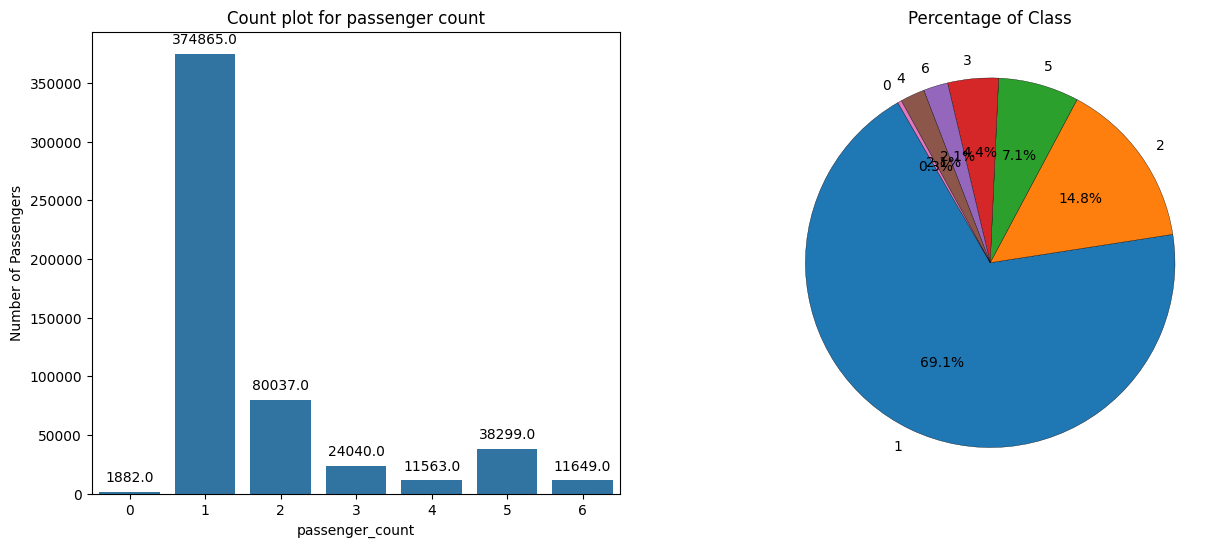

In [31]:
fig,axes = plt.subplots(1,2,figsize=(15,6))
sns.countplot(data=df,x='passenger_count',ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_ylabel('Number of Passengers')
axes[0].set_title('Count plot for passenger count')
class_counts = df['passenger_count'].value_counts()
axes[1].pie(class_counts,labels=class_counts.index, startangle = 120,autopct='%1.1f%%',wedgeprops = {'edgecolor' : 'black','linewidth': 0.25,'antialiased' : True})
axes[1].set_title('Percentage of Class')
plt.show()

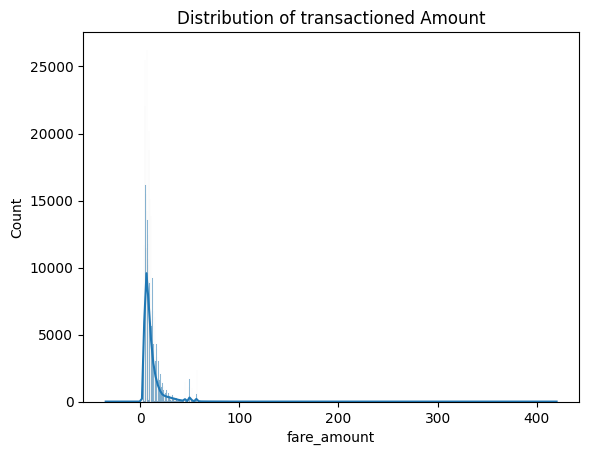

In [32]:
sns.histplot(df['fare_amount'],kde=True)
plt.title('Distribution of transactioned Amount')
plt.show()

Text(0, 0.5, 'Number of taxis hired')

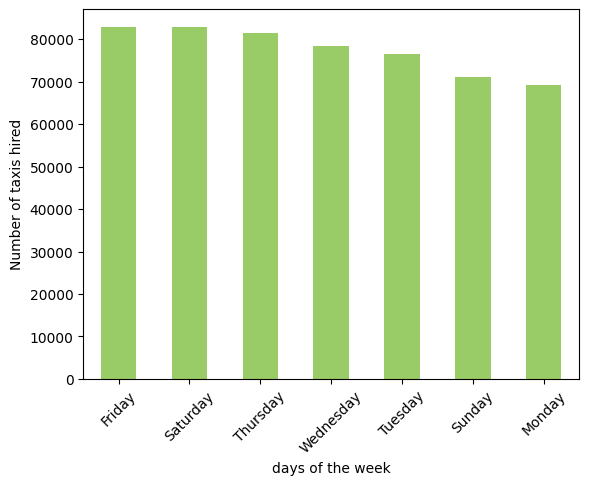

In [33]:
# busiest day of the week

busiest_day=df['pickup_datetime'].dt.dayofweek.value_counts()

day_mapping ={
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}

busiest_day.index=busiest_day.index.map(day_mapping)

busiest_day.plot.bar(color=(.6,.8,.4))

plt.xticks(rotation=45)
plt.xlabel('days of the week')
plt.ylabel('Number of taxis hired')

In [34]:
(busiest_day.index)

Index(['Friday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Sunday',
       'Monday'],
      dtype='object', name='pickup_datetime')

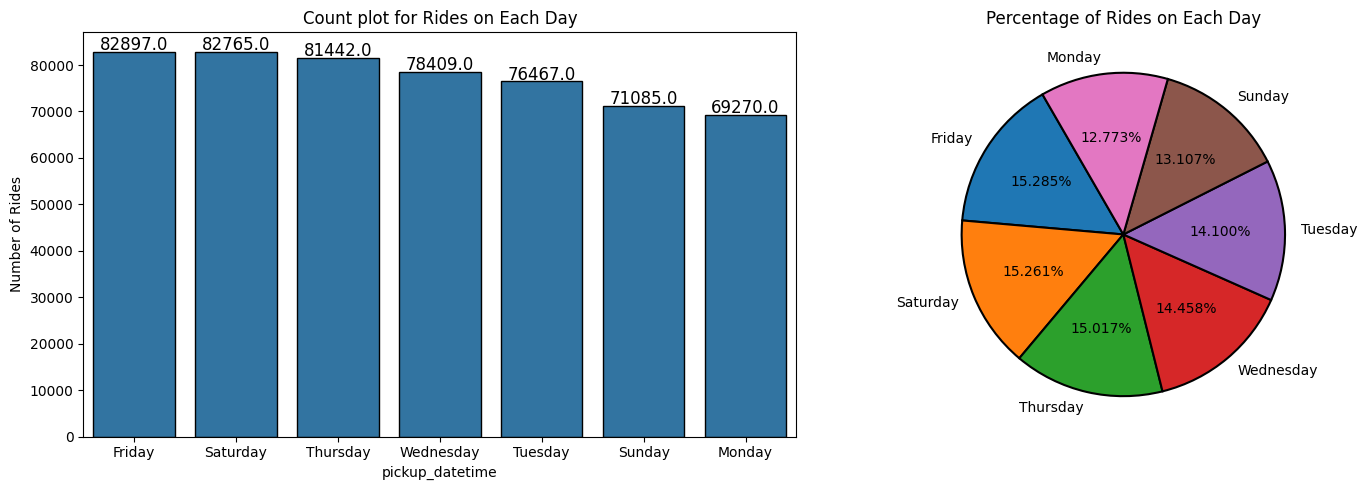

In [35]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=busiest_day.index, y=busiest_day.values, ax=axes[0],edgecolor='black')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
axes[0].set_ylabel('Number of Rides')
axes[0].set_title('Count plot for Rides on Each Day')
axes[1].pie(busiest_day,labels=busiest_day.index,autopct='%1.3f%%',startangle = 120,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1.5,'antialiased' : True})
axes[1].set_title('Percentage of Rides on Each Day')
plt.tight_layout()
plt.show()

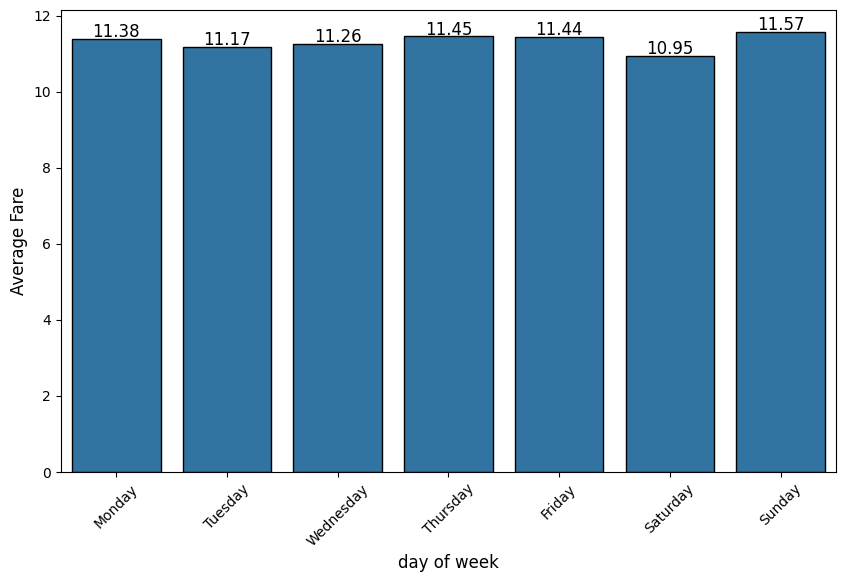

In [36]:
# is the average fare same on each day?
plt.figure(figsize=(10, 6))
day_name=pd.Series(df.pickup_datetime.dt.dayofweek.unique()).sort_values()
average_fare_each_day=[]

for items in day_name:
  average_fare_each_day.append(df[df.pickup_datetime.dt.dayofweek==items].fare_amount.sum()/len(df[df.pickup_datetime.dt.dayofweek==items]))

day_name=day_name.map(day_mapping)

ax = sns.barplot(x=day_name, y=average_fare_each_day,edgecolor='black')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('day of week', fontsize=12)
plt.ylabel('Average Fare', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-37-5a53489de45f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=busiest_hour.index, y=busiest_hour,palette=palette)


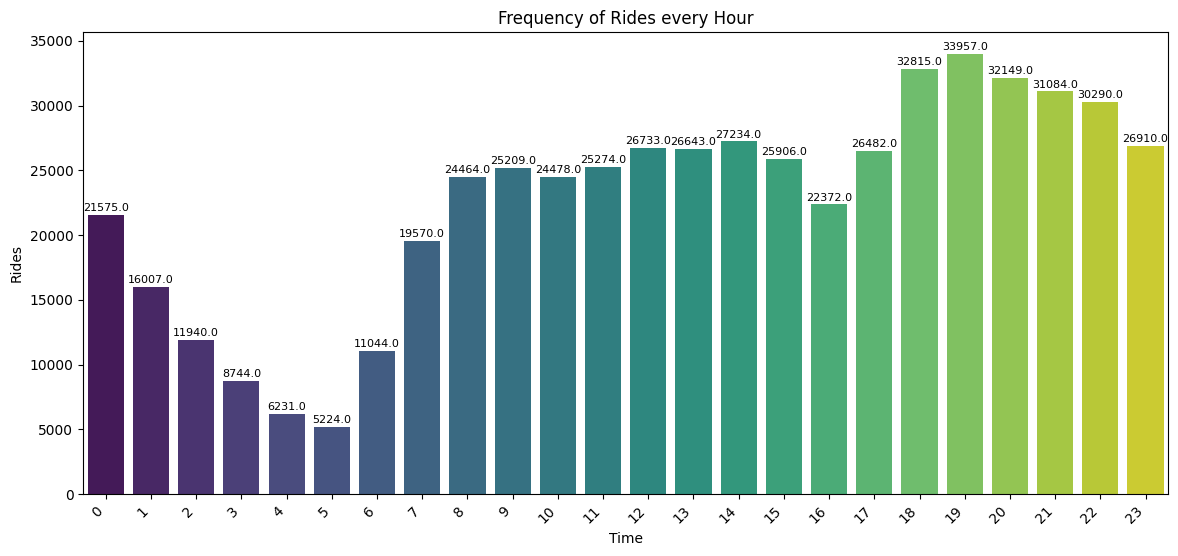

In [37]:
busiest_hour=df['pickup_datetime'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(14, 6))
palette = sns.color_palette("viridis", len(busiest_hour))
ax = sns.barplot(x=busiest_hour.index, y=busiest_hour,palette=palette)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Frequency of Rides every Hour')
plt.xlabel('Time')
plt.ylabel('Rides')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

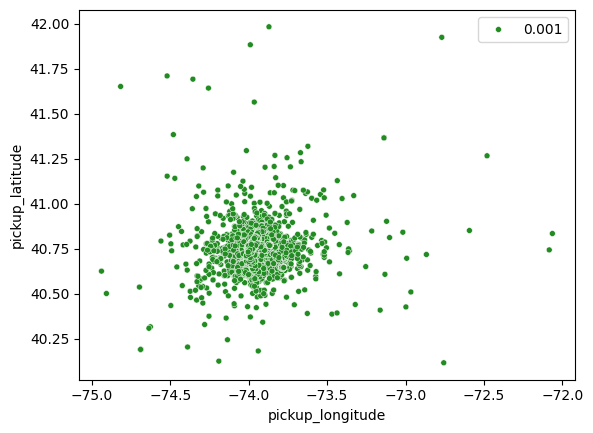

In [38]:
sns.scatterplot(x=df.pickup_longitude,y=df.pickup_latitude, size=0.001,color=(34/255,139/255,34/255))

<Axes: xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

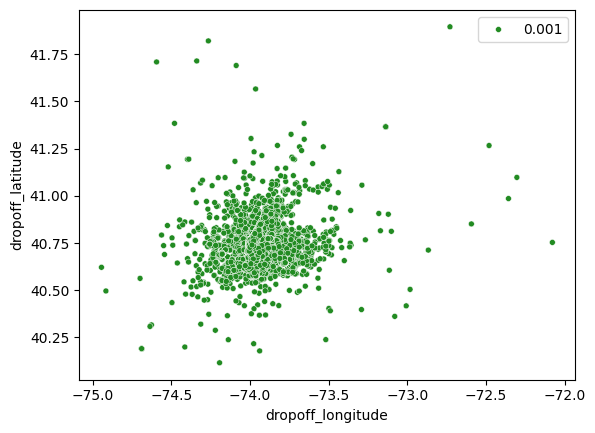

In [39]:
sns.scatterplot(x=df.dropoff_longitude,y=df.dropoff_latitude, size=0.001, color=(34/255,139/255,34/255))

In [40]:
# finding the top 0.1% pickup locations which have highest fare

fare_amount_threshold = df["fare_amount"].quantile(0.999)

top_df = df[df["fare_amount"] >= fare_amount_threshold]

top_locations_pickup = [(lat, lon) for lat, lon in zip(top_df["pickup_latitude"], top_df["pickup_longitude"])]

# plotting top locations on map

import folium

map = folium.Map()

# Add a marker for each location using a for loop
for location in top_locations_pickup:
    folium.Marker(location).add_to(map)

# Display the map
display(map)

In [41]:
# finding the top 0.1% dropoff locations which have highest fare

top_locations_dropoff = [(lat, lon) for lat, lon in zip(top_df["dropoff_latitude"], top_df["dropoff_longitude"])]

# plotting top locations on map

map = folium.Map()

# Add a marker for each location using a for loop
for location in top_locations_dropoff:
    folium.Marker(location).add_to(map)

# Display the map
display(map)

# __Split Training & Validation Set__
We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.
Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

validation set should be similar to the test set or real world data as possible i.e. the evaluation metric score of a model on validation and test set should be very close , otherwise we will be shooting in the dark.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_df,val_df = train_test_split(df,test_size=0.2, random_state=15)

len(train_df),len(val_df)

(433868, 108467)

In [44]:
# removing any missing value

train_df=train_df.dropna()
val_df=val_df.dropna()

In [45]:
# extract inputs and outputs
# wont include date and month since those doesnot have any significant impact on fare_amount

input_cols =['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
             'passenger_count']
target_cols =['fare_amount']

In [46]:
X_train=train_df[input_cols]
Y_train=train_df[target_cols]

X_val=val_df[input_cols]
Y_val=val_df[target_cols]

# test_inputs=test_df[input_cols]

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [48]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha=0.1)
model_lasso = Lasso(alpha=0.1)
model_elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
model_KNR = KNeighborsRegressor(n_neighbors=100,weights='distance',n_jobs=-1)
model_DTR = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split=5, min_samples_leaf=2,
                                max_features="sqrt", random_state=15)
model_SVR = LinearSVR()
model_RFR = RandomForestRegressor(random_state=15,
                                n_jobs=-1,max_depth=10,n_estimators=100)
model_GBR = GradientBoostingRegressor(max_depth=10,loss='squared_error',n_estimators=200,
                                  learning_rate=0.05,criterion='squared_error')

In [49]:
from sklearn.metrics import r2_score

In [61]:
model_linear.fit(X_train,Y_train)
model_ridge.fit(X_train,Y_train)
model_lasso.fit(X_train,Y_train)
model_elastic.fit(X_train,Y_train)
model_KNR.fit(X_train,Y_train)
model_DTR.fit(X_train,Y_train)
model_SVR.fit(X_train,Y_train)
model_RFR.fit(X_train,Y_train)
model_GBR.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-61-80b2760e1888>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(X_train,Y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(criterion='squared_error', learning_rate=0.05,
                          max_depth=10, n_estimators=200)

In [62]:
r2_linear = r2_score(Y_val,model_linear.predict(X_val))
r2_ridge = r2_score(Y_val,model_ridge.predict(X_val))
r2_lasso = r2_score(Y_val,model_lasso.predict(X_val))
r2_elastic = r2_score(Y_val,model_elastic.predict(X_val))
r2_knr = r2_score(Y_val,model_KNR.predict(X_val))
r2_dtr = r2_score(Y_val,model_DTR.predict(X_val))
r2_svr = r2_score(Y_val,model_SVR.predict(X_val))
r2_rfr = r2_score(Y_val,model_RFR.predict(X_val))
r2_gbr = r2_score(Y_val,model_GBR.predict(X_val))

In [63]:
# Define the model names and corresponding R^2 scores
models = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Elastic Net Regression",
    "K-Nearest Neighbors Regression",
    "Decision Tree Regression",
    "Support Vector Regression",
    "Random Forest Regression",
    "Gradient Boosting Regression"
]

r2_scores = [
    r2_linear,
    r2_ridge,
    r2_lasso,
    r2_elastic,
    r2_knr,
    r2_dtr,
    r2_svr,
    r2_rfr,
    r2_gbr
]

# Print the models and their corresponding R^2 scores in a table-like format
print("Model                         R^2 Score")
print("----------------------------------------")
for model, r2_score in zip(models, r2_scores):
    print(f"{model:<30} {r2_score:.4f}")


Model                         R^2 Score
----------------------------------------
Linear Regression              0.2188
Ridge Regression               0.2189
Lasso Regression               0.0666
Elastic Net Regression         0.0074
K-Nearest Neighbors Regression 0.7999
Decision Tree Regression       0.7118
Support Vector Regression      -0.0932
Random Forest Regression       0.7408
Gradient Boosting Regression   0.8068
